# Программирование на `C++` и `python`
## Лекция 7. `SciPy`: научные вычисления

Воробьев Виталий Сергеевич, ноябрь 2021

## Что такое SciPy?
* A Python-based ecosystem of open-source software for mathematics, science, and engineering
* Как произносить: “Sigh Pie” («Сай-пай»)
* Сайт: [scipy.org](scipy.org)
* Что почитать:
 * [docs.scipy.org](docs.scipy.org)
 * [scipy-lectures.org](scipy-lectures.org)
 * [github.com/jakevdp/PythonDataScienceHandbook](github.com/jakevdp/PythonDataScienceHandbook)


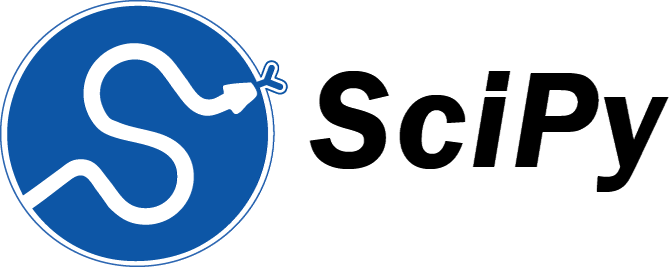

Базовые пакеты:
* `NumPy` – пакет для работы с многомерными массивами. Фундамент стека SciPy
* `SciPy library` – библиотека для научных вычислений
* `Matplotlib` – мощная библиотека для 2D рисования
* `pandas` – инструменты для хранения и анализа данных
* `Sympy` – символьная математика
* `IPython` – улучшенная интерактивная консоль

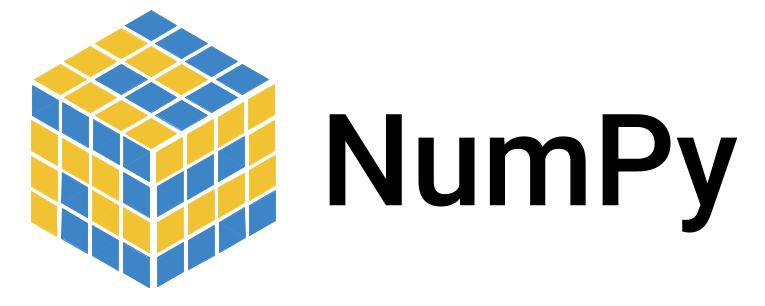
* Массивы `numpy`
* Операции с массивами
* Работа с файлами

### `numpy array`
Memory-efficient and fast container for numerical operations

In [1]:
import numpy as np

In [19]:
a = np.array([0, 1, 2, 3])
print(a)

[0 1 2 3]


In [20]:
a.ndim

1

In [21]:
a.shape

(4,)

In [22]:
a.size

4

In [23]:
a.dtype

dtype('int64')

In [24]:
a[0]

0

<img src="figs/mcqueen.png" height=200px/>

In [25]:
a = np.arange(1000)

In [26]:
%%timeit
a**2

2.26 µs ± 506 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [27]:
l = list(range(1000))

In [28]:
%%timeit
[i**2 for i in l]

319 µs ± 29.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [29]:
print(np.arange(10))

[0 1 2 3 4 5 6 7 8 9]


In [30]:
print(np.arange(1, 9, 2))

[1 3 5 7]


In [31]:
print(np.linspace(0, 1, 6))

[0.  0.2 0.4 0.6 0.8 1. ]


In [33]:
print(np.zeros((3, 3)))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [34]:
print(np.ones((2, 2)))

[[1. 1.]
 [1. 1.]]


In [39]:
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [40]:
print(np.diag([1, 2, 3, 4]))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Случайные числа: `np.random`

In [58]:
rng = np.random.default_rng(seed=1)
type(rng)

numpy.random._generator.Generator

In [59]:
6*rng.random(1) + 4

array([7.07092975])

In [46]:
rng.normal(loc=0.1, scale=10, size=5)

array([  2.27321931,  21.27838755, -11.02020763,  -3.67605007,
        20.52771607])

### Размерность массива

In [62]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)

[[1 2 3]
 [4 5 6]]


In [63]:
print(a.flatten()) # copy

[1 2 3 4 5 6]


In [64]:
print(a.ravel()) # view

[1 2 3 4 5 6]


* `flatten` возвращает копию
* `ravel`, `T` и `reshape` не копируют данные, если возможно

In [73]:
print(a)

[[1 2 3]
 [4 5 6]]


In [74]:
print(a.reshape(-1,2)) # view
print(a)

[[1 2]
 [3 4]
 [5 6]]
[[1 2 3]
 [4 5 6]]


In [75]:
print(a.T)

[[1 4]
 [2 5]
 [3 6]]


In [76]:
print(a.T.ravel())

[1 4 2 5 3 6]


In [77]:
a = np.arange(12).reshape(3, -1)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [78]:
b = np.resize(a, (2, 6))
print(b)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


In [79]:
a.resize(2, 6) # in-place
print(a)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


* `reshape` не изменяет объект
* `resize` изменяет объект

#### Индексирование и выбор подмножества
* Python style
* Fancy indexing

In [80]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [81]:
a[0]

0

In [82]:
print(a[::-1])

[9 8 7 6 5 4 3 2 1 0]


In [85]:
b = np.diag(np.arange(3))
print(b)

[[0 0 0]
 [0 1 0]
 [0 0 2]]


In [88]:
b[2,1] = 8
print(b)

[[0 0 0]
 [0 1 0]
 [0 8 2]]


In [89]:
print(b[1])

[0 1 0]


In [90]:
print(b[1:, 1:])

[[1 0]
 [8 2]]


In [98]:
a = np.random.default_rng().integers(0, 20, 15)
print(a)

[19 12  2 10  9 11 13 14  8  3  8  9 10 16 13]


In [99]:
mask = (a % 3 == 0)
print(mask)
print(~mask)
# a[~mask] = 0
# a

[False  True False False  True False False False False  True False  True
 False False False]
[ True False  True  True False  True  True  True  True False  True False
  True  True  True]


In [93]:
b = a[mask]
print(b)

[3 0 3 6 0]


In [94]:
c = a[[2, 5, 1, 2, 8]]
print(c)

[8 3 3 8 5]


В следующем примере копирование не выполняется

In [100]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [101]:
b = a[2:9:3]
print(b)

[2 5 8]


In [102]:
b[:] = -1
print(a)

[ 0  1 -1  3  4 -1  6  7 -1  9]


А здесь копирование происходит

In [103]:
a = np.arange(10)

In [104]:
b = a[2:9:3].copy()
c = a[a % 3 == 0]
d = a[[2, 5, 1, 8]]
print(b, c, d)

[2 5 8] [0 3 6 9] [2 5 1 8]


In [105]:
b[:] = -1
c[:] = -2
d[:] = -3
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Пример: нахождение простых чисел

In [107]:
%%time
is_prime = np.ones(10**8, dtype=bool)
is_prime[:2] = 0 # exclude 0 and 1
N_max = int(np.sqrt(is_prime.size))
for j in range(2, N_max):
    is_prime[2*j::j] = False
primes = np.nonzero(is_prime)[0]
print(primes.size, primes[-5:])

5761455 [99999931 99999941 99999959 99999971 99999989]
CPU times: user 8.16 s, sys: 176 ms, total: 8.33 s
Wall time: 9.06 s


#### Операции с массивами

* Арифметические операции

In [116]:
a = np.array([1, 2, 3, 4])
print(a + 1)

[2 3 4 5]


In [109]:
print(a**2)

[ 1  4  9 16]


In [110]:
print(a**a)

[  1   4  27 256]


In [117]:
b = np.ones(4) + 1 
print(a - b)

[-1.  0.  1.  2.]


In [118]:
print(a * b)

[2. 4. 6. 8.]


In [119]:
print(np.dot(a, b))

20.0


* Логические операции

In [128]:
print(a == b)
print(a)
print(b)
c = a
c is a

[False  True False False]
[1 2 3 4]
[2. 2. 2. 2.]


True

In [121]:
print(np.allclose(a, b))

False


In [129]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)

In [134]:
print(a | ~b)

[ True  True False  True]


In [131]:
print(a & b)

[ True False False False]


In [133]:
np.all(a)
np.any(a)

True

* Трансцендентые функции

In [135]:
a = np.linspace(0.1, 1, 5)
print(a)

[0.1   0.325 0.55  0.775 1.   ]


In [136]:
print(np.sin(a))

[0.09983342 0.31930879 0.52268723 0.69971608 0.84147098]


In [137]:
print(np.log(a))

[-2.30258509 -1.1239301  -0.597837   -0.25489225  0.        ]


In [138]:
print(np.exp(a))

[1.10517092 1.38403065 1.73325302 2.17059213 2.71828183]


* Суммирование
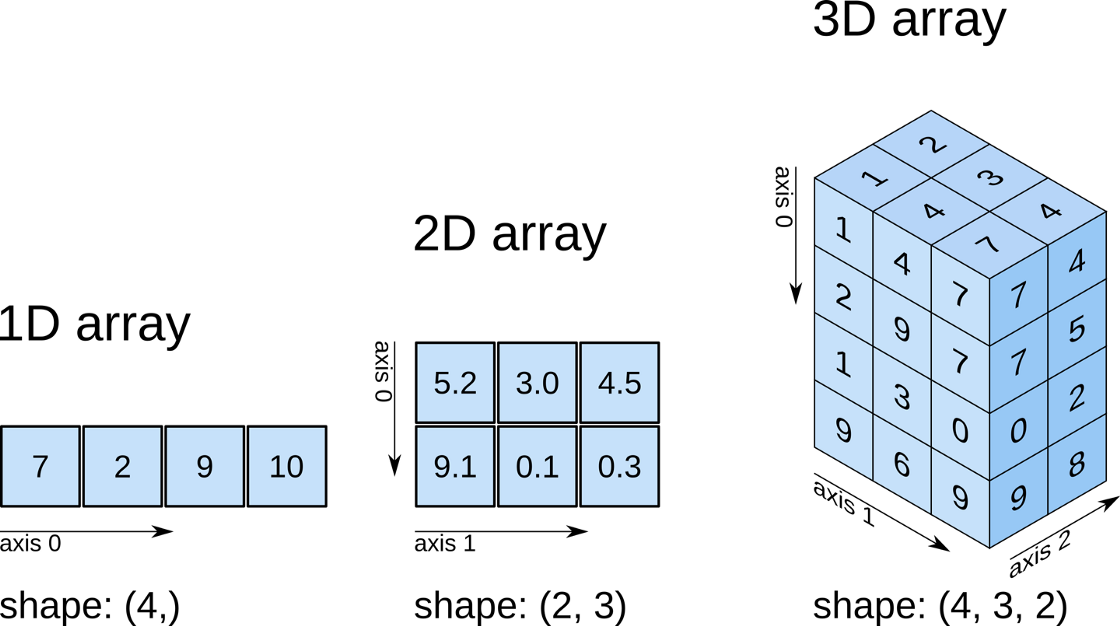

In [139]:
x = np.array([1, 2, 3, 4])
print(np.sum(x), x.sum())

10 10


In [140]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print(x)

[[1 2 3]
 [4 5 6]]


In [141]:
print(x.sum(axis=0)) # columns

[5 7 9]


In [142]:
print(x.sum(axis=1)) # rows

[ 6 15]


* Экстремумы

In [143]:
x = np.array([1, 3, 2])

In [144]:
x.min()

1

In [145]:
x.max()

3

In [146]:
x.argmin() # index of minimum

0

In [147]:
x.argmax() # index of maximum

1

* Статистика

In [158]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 4], [5, 6, 1]])

In [159]:
x.mean()

1.75

In [160]:
np.median(y)

3.0

In [161]:
np.median(y, axis=-1)
np.sqrt(np.sum((x - x.mean())**2) / x.size)

0.82915619758885

In [162]:
x.std()

0.82915619758885

* Сортировка

In [163]:
a = np.array([[4, 3, 5], [1, 2, 1]])

In [167]:
b = np.sort(a, axis=1)
b[0,1] = 99
print(a)
print(b)

[[3 4 5]
 [1 1 2]]
[[ 3 99  5]
 [ 1  1  2]]


In [165]:
a.sort(axis=1) # in-place sort
print(a)

[[3 4 5]
 [1 1 2]]


In [170]:
a = np.array([4, 3, 1, 2])
j = np.argsort(a % 3)
print(j)

[1 0 2 3]


In [171]:
print(a[j])

[3 4 1 2]


#### Broadcasting
* Основные операции над массивами `numpy` выполняются поэлементно
* Необходимо следить за соответствием размеров массивов
* В некоторых случаях можно выполнять операции с массивами разных размеров. При этом `numpy` автоматически преобразовывает размеры массивов

In [172]:
a = np.ones((4, 5))
print(a)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [173]:
a[0] = 2
print(a)

[[2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


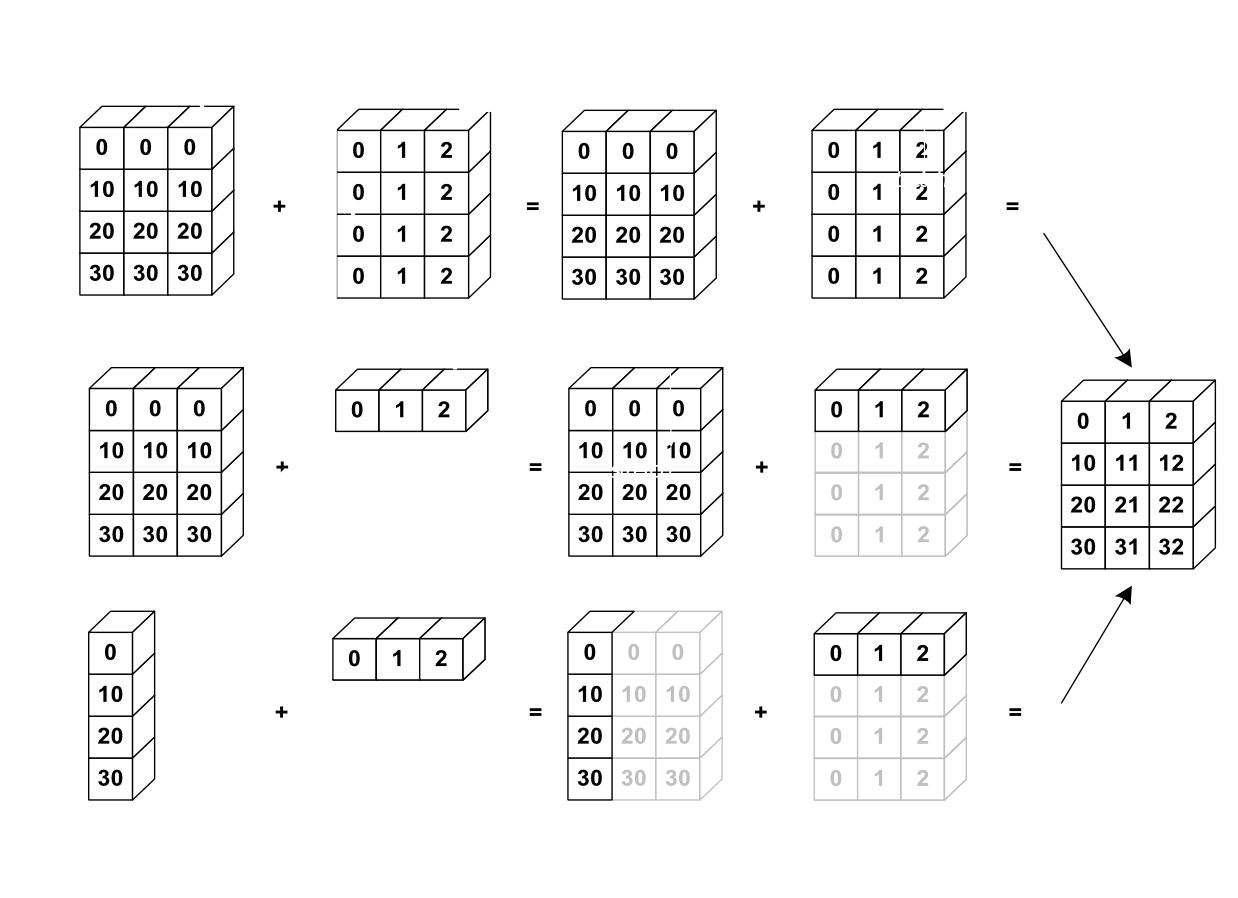

### Линейная алгебра с `numpy`

In [195]:
a = np.array([1, 2, 3]).reshape(1, -1)  # вектор-строка
b = np.array([4, 5, 6]).reshape(1, -1)  # вектор-строка
mtx = np.arange(9).reshape(-1, 3)

In [187]:
(a @ b.T).item()  # (1, 3) x (3, 1) -> (1, 1)

32

In [188]:
a.T @ b  # (3, 1) x (1, 3) -> (3, 3)

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [189]:
mtx @ a.T  # (3, 3) x (3, 1) -> (3, 1)

array([[ 8],
       [26],
       [44]])

In [190]:
a @ mtx

array([[24, 30, 36]])

In [191]:
mtx @ mtx

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

#### Полиномы в `numpy`
Пример: $3𝑥^2+2𝑥−1$

In [196]:
p = np.polynomial.Polynomial([-1, 2, 3])
p

Polynomial([-1.,  2.,  3.], domain=[-1,  1], window=[-1,  1])

In [197]:
p(0)

-1.0

In [198]:
p.degree()

2

In [199]:
print(p.roots())

[-1.          0.33333333]


In [229]:
x = np.linspace(-1, 1, 200)
# y = np.cos(x) + np.cos(2*x + 0.3) + 0.4*np.cos(6*x + 0.9) + 0.3*np.random.default_rng(seed=1).random(200)
y = np.cos(2*x + 0.3) + 0.3*np.random.default_rng(seed=1).random(200) - 0.15
# p = np.polynomial.Chebyshev.fit(x, y, 6);

def fcn(x1):
    a, om, phi = x1
    return np.sum((y - a*np.cos(om*x + phi))**2)

from scipy.optimize import minimize

In [231]:
fitres = minimize(fcn, [1.1, 1.8, 0.0])
# import matplotlib.pyplot as plt
# a0, om0, phi0 = [1.14167389, 1.81829688, 0.27182447]
fitres

      fun: 1.3988912144380088
 hess_inv: array([[ 0.00612886,  0.00105304, -0.00061062],
       [ 0.00105304,  0.00927938, -0.00061481],
       [-0.00061062, -0.00061481,  0.00439334]])
      jac: array([-3.15904617e-06, -5.72204590e-06,  1.31130219e-06])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 8
     njev: 12
   status: 0
  success: True
        x: array([1.00330931, 1.99547162, 0.30308226])

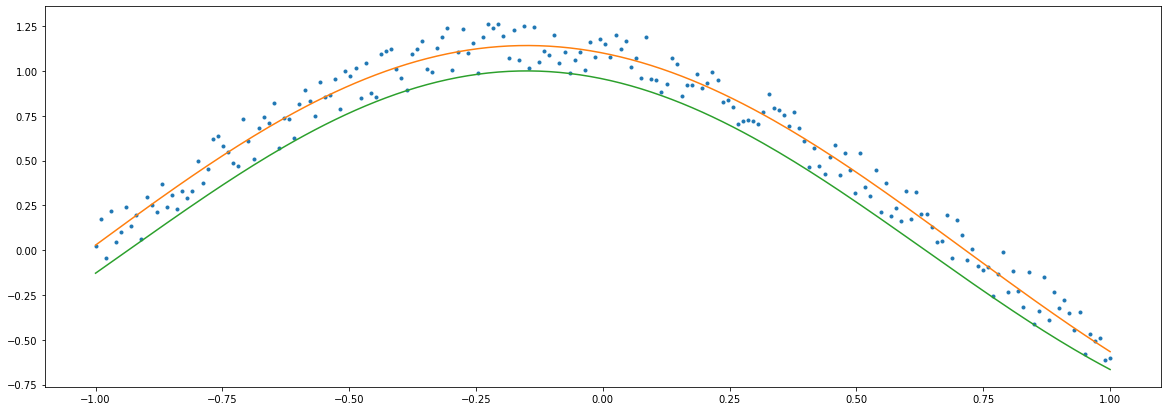

In [228]:
plt.figure(num=2, figsize=(20, 7))
plt.plot(x, y, '.')
plt.plot(x, a0*np.cos(om0*x + phi0))
plt.plot(x, np.cos(2*x + 0.3))
plt.show()

#### Работа с файлами в `numpy`
* Бинарный формат `.npy` позволяет быстро записывать/считывать данные, выполняет сжатие данных
* `numpy` поддерживает несколько других форматов данных. Читайте документацию

In [235]:
data = np.loadtxt('data/population.txt')
np.savetxt('data/pop.txt', data)
np.save('data/pop', data)
data3 = np.load('data/pop.npy')
print(data3)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


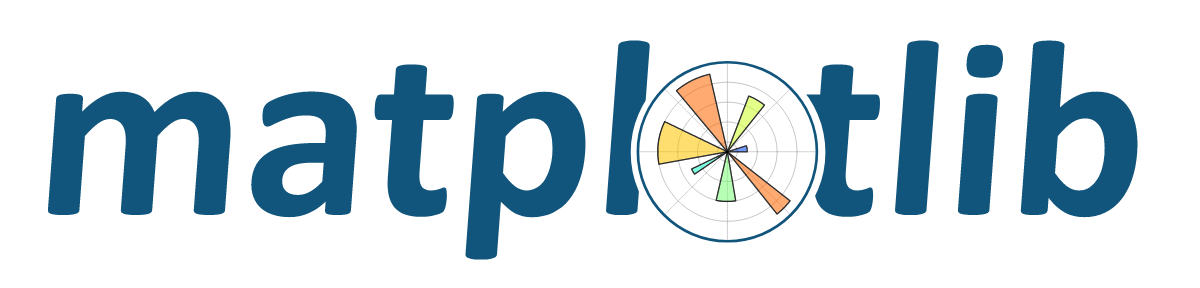

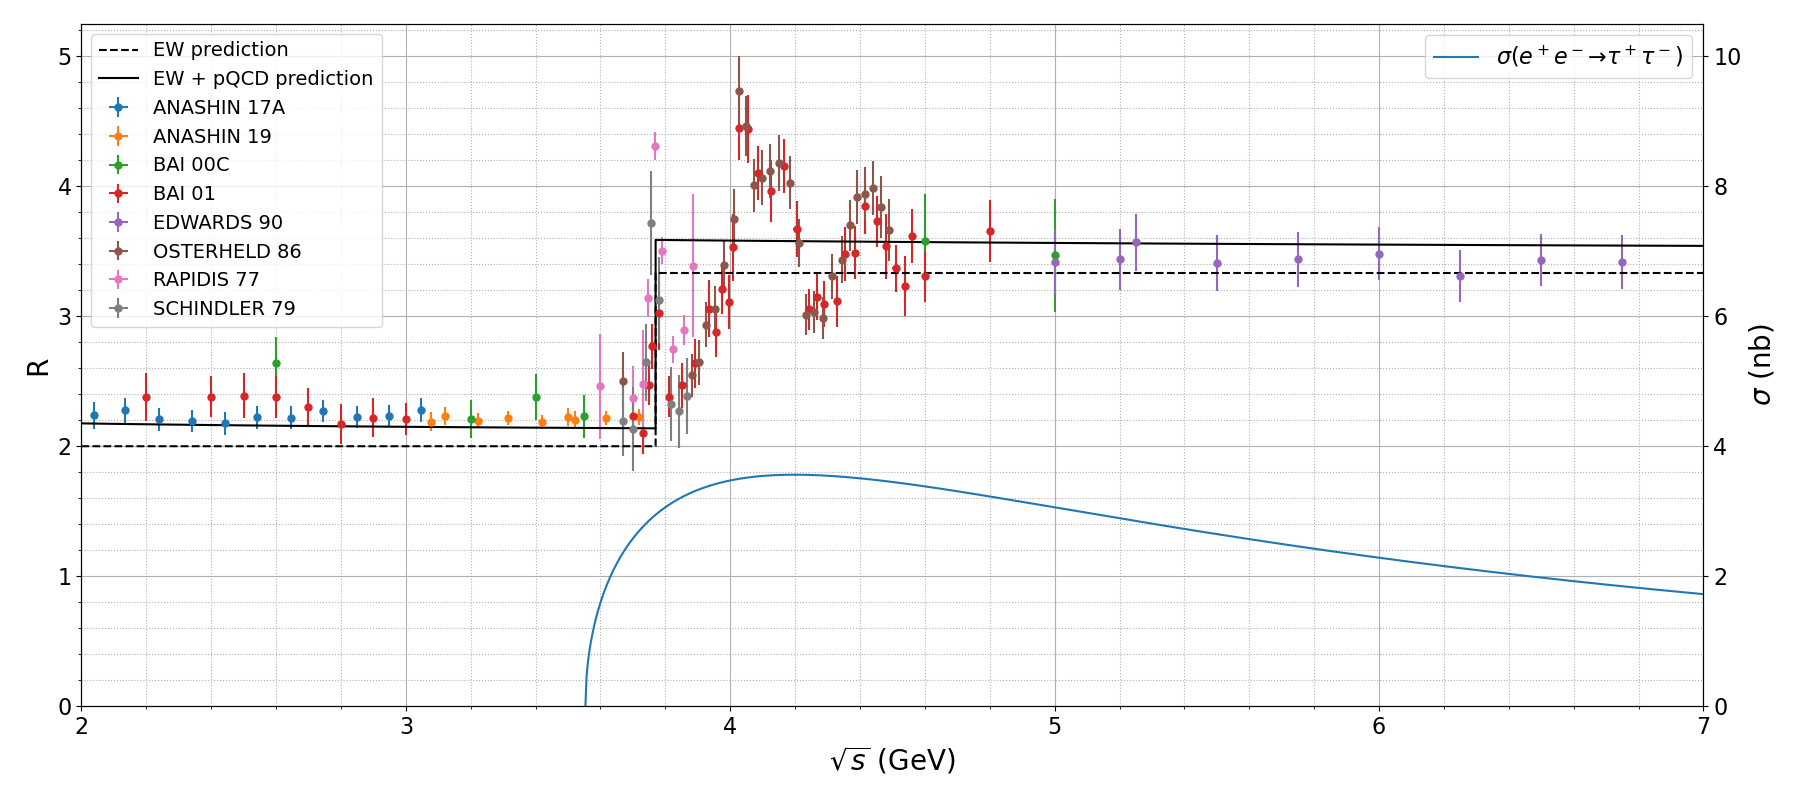